# Introduction to statsmodels

* [`statsmodels`](http://www.statsmodels.org/stable/index.html) is a Python package that allows you to estimate common econometric models
* Still in development and not as full-featured as econometrics in R or STATA
* Can use in conjuction with pandas

### Reading

https://lectures.quantecon.org/py/ols.html

Start by importing dataframes from our earlier tutorial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

majors = pd.read_csv('recent-grads.csv')
majors.plot(x='Unemployment_rate', y='Median', kind='scatter', figsize=(10, 8), color='red')
plt.xlabel('Unemployment rate')
plt.ylabel('Median salary')
plt.show()

<Figure size 1000x800 with 1 Axes>

From the plot, it appears that the share of women is negatively correlated with the median salary

We may want to know more about this relationship:
* do citation counts affect total replications/extensions?
* is this relationship statistically significant?
* are there statistically significant differences across fields?

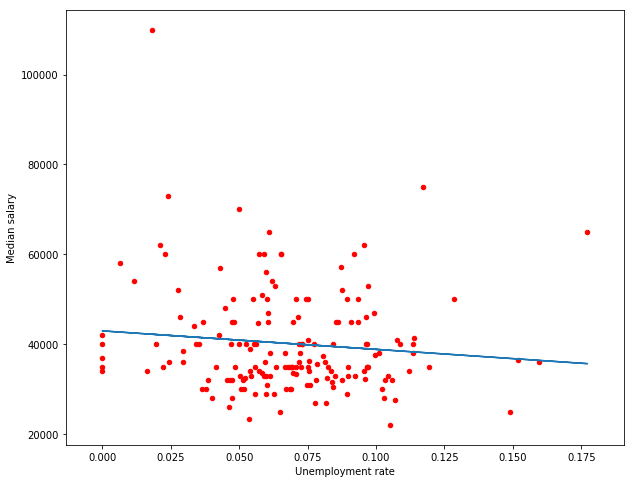

In [2]:
from numpy.polynomial.polynomial import polyfit

majors.plot(x='Unemployment_rate', y='Median', kind='scatter', figsize=(10, 8), color='red')
plt.xlabel('Unemployment rate')
plt.ylabel('Median salary')

# Fit the linear line
b, m = polyfit(majors.Unemployment_rate, majors.Median, 1)
plt.plot(majors.Unemployment_rate, b + m * majors.Unemployment_rate)
plt.show()

To attempt to answer these questions, we can fit a linear line - in other words use a **linear regression model**

$$
y_t = \beta_0 + \beta_1 x_t + u_t \\
\text{median salary}_t = \beta_0 + \beta_1 \text{unemployment rate}_t + u_t
$$

* $\beta_0$ is the constant term
* $\beta_1$ is the slope term
* $u_t$ is the error term

To estimate $\beta_0$, we will need to add a column of 1's to our dataframe

In [3]:
majors['constant'] = 1

### Using statsmodels

We will use statsmodels' OLS (ordinary least squares) function to estimate our linear regression model

In [4]:
import statsmodels.api as sm

reg = sm.OLS(endog=majors.Median, exog=majors[['constant', 'Unemployment_rate']], missing='drop')

We then use `.fit()` to estimate the parameters

In [5]:
results = reg.fit()
results

In [6]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Median   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.050
Date:                Wed, 10 Apr 2019   Prob (F-statistic):              0.154
Time:                        04:32:37   Log-Likelihood:                -1861.1
No. Observations:                 173   AIC:                             3726.
Df Residuals:                     171   BIC:                             3732.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
constant           4.296e+04   2144.45

Our results show that...
* the coefficient for unemployment rate is statistically insignificant
* the $R^2$ value indicates the model does a poor job of explaining variation in median salary

We can retrieve our predicted results with `.predict()`

In [7]:
results.predict()

array([42201.49955242, 38132.66007134, 41966.2505909 , 40894.97188265,
       40443.3782604 , 35663.84207855, 39021.21209059, 42086.79894349,
       40597.94154626, 40522.5593098 , 40265.92624168, 40276.09989901,
       39168.07403432, 42009.61179758, 42697.28719802, 39371.42333874,
       41193.35234103, 40495.79121928, 40409.09136011, 42476.87583189,
       40357.97456608, 38968.56021394, 39354.3823907 , 41814.28082831,
       40561.00967615, 40051.89630509, 40487.60874907, 40988.25928681,
       39896.20057787, 37672.319672  , 39106.14412298, 40693.09267356,
       39279.56322639, 39869.62279842, 41111.56550351, 40460.30853664,
       38879.62531103, 38988.44241067, 41792.90820458, 40013.58319813,
       40087.31457666, 41012.19489514, 39111.42249742, 40973.20425774,
       41435.88181192, 40458.04122563, 39407.20556376, 39219.95491245,
       39437.74797866, 40612.24199854, 41572.98191764, 41208.54006103,
       42957.99125189, 38266.7828214 , 39861.47852211, 38530.31787579,
      

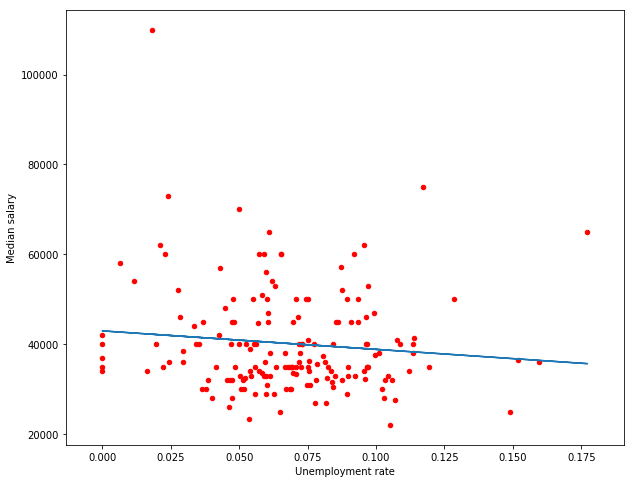

In [8]:
majors.plot(x='Unemployment_rate', y='Median', kind='scatter', figsize=(10, 8), color='red')
plt.xlabel('Unemployment rate')
plt.ylabel('Median salary')
plt.plot(majors.Unemployment_rate, results.predict())

plt.show()

/Users/natashawatkins/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


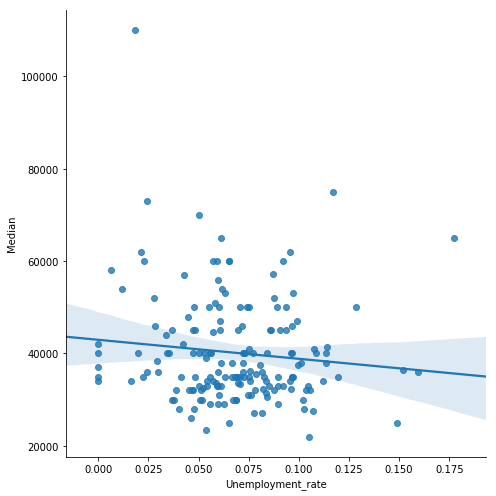

In [9]:
import seaborn as sns

sns.lmplot(x="Unemployment_rate", y="Median", height=7, data=majors)
plt.show()

### Adding dummies

We can expand our model to include dummies (indicator variables) for each major category

$$
\text{Median salary}_t = \beta_0 + \beta_1 \text{Unemployment rate}_t + \beta_2 \text{Business}_t + \beta_3 \text{Physical Sciences}_t + \cdots +  u_t
$$

Dummy variables test whether there are statistically significant differences between categories

To avoid multicollinearity, we need to drop one of our fields
* this implies that the 'base case' is Agriculture & Natural Resources

In [10]:
dummies = pd.get_dummies(majors.Major_category, drop_first=True)
dummies.head()

,Arts,Biology & Life Science,Business,Communications & Journalism,Computers & Mathematics,Education,Engineering,Health,Humanities & Liberal Arts,Industrial Arts & Consumer Services,Interdisciplinary,Law & Public Policy,Physical Sciences,Psychology & Social Work,Social Science
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [11]:
merged = pd.merge(majors, dummies, left_index=True, right_index=True)
merged.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Education,Engineering,Health,Humanities & Liberal Arts,Industrial Arts & Consumer Services,Interdisciplinary,Law & Public Policy,Physical Sciences,Psychology & Social Work,Social Science
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,0,1,0,0,0,0,0,0,0,0
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,0,1,0,0,0,0,0,0,0,0
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,0,1,0,0,0,0,0,0,0,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,0,1,0,0,0,0,0,0,0,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,0,1,0,0,0,0,0,0,0,0


In [12]:
reg_2 = sm.OLS(endog=merged.Median, 
               exog=merged[['constant', 'Unemployment_rate'] + list(dummies.columns)], 
               missing='drop')

In [13]:
results_2 = reg_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Median   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     13.33
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           7.19e-22
Time:                        04:32:37   Log-Likelihood:                -1787.5
No. Observations:                 173   AIC:                             3609.
Df Residuals:                     156   BIC:                             3663.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

The results show that...
* Business, engineering and mathematics majors have a positive statistically significant effect on median salary, relative to Agriculture
* Psychology majors have a negative statistically significant effect on median salary, relative to Agriculture
* The adjusted $R^2$ has increased to 0.53 -> the model does a far better job explaining variation in median salary, suggesting that major choice is a contributing factor to salary

## Exercise

Does the proportion of low wage jobs (out of total jobs) in each major differ by major category?
* Add a new variable to your DataFrame to represent low wage rate
* Run a regression on the dummies for major catetorgy
* Which majors (if any) exhibit a statistically significant difference in determining the proportion of low wage jobs?